# 01 Simple guide to using the notebook with the datacube 

These notebooks contain cells blocks that will need to be run in order. If ever in doubt revert back to the start and re run the notebook from cell 1 onwards.
The datacube contains 2 ARD products. Sentinel 1 and Sentinel 2 <br>

#### For the EO Data Hub Pilot no Sentinel 1 ARD has been injested

In [1]:
import datacube
dc = datacube.Datacube()
products = dc.list_products()
products

,name,description,license,default_crs,default_resolution
name,,,,,
sentinel1,sentinel1,Sentinel-1 gamma0 scenes,None,None,None
sentinel2,sentinel2,Sentinel-2 Surface Reflectance 10 metre,None,None,None


Throughout these notebooks you will find calls to the datacube. These calls will, in these examples, contain queries based on product name (Sentinel 2), a time period to query the data (2015 onwards), an output coordinate reference system, a bounding box desciption and a resolution. We have aimed to injest the whole of England, but the focus on this project is teh south coast of England including the South Downs National Park. <br>
You should <u>change these parameters as needed. </u> <br> <br>
The bigger the area the wider the timeslice the bigger the xarray dataset you will get returned. Be careful not to overwhelm the search by inputting country level multi year queries into the cube. You will run out of memory in the current setup (28gb available) <br>
An example query will look similar to below:

In [2]:
query = {
    'time': ('2020-01-01','2020-02-28'),
    'output_crs': 'epsg:27700',
    'resolution': (-10,10),
    'x': (-2.3726, -2.0418),
    'y': (51.8419, 52.1384)
}

The above query will search a lat long (by defauly coordinate system). However if you wished to use British National Grid (which is the project the England data is loaded into the cube in) the query would like similar to (with a different location in this case). Within the query you can also set parameters for the measurements (ie the bands).<br>

`'measurements':('red','green','blue')`

In [3]:
query = {
    'time': ('2020-01-01','2020-02-28'),
    'output_crs': 'epsg:27700',
    'resolution': (-10,10),
    'x': (579072, 582909),
    'y': (281662, 284360),
    'crs': 'epsg:27700'
}

You would then specify which product you wished to query using - you can also control the dask chunks for more optimal processesing. For example: https://docs.dea.ga.gov.au/notebooks/Beginners_guide/09_Parallel_processing_with_Dask.html 

In [4]:
ds = dc.load(product='sentinel2',
            dask_chunks={},
            **query)
ds

<xarray.Dataset>
Dimensions:      (time: 14, y: 270, x: 384)
Coordinates:
  * time         (time) datetime64[ns] 2020-01-09T11:03:29 ... 2020-02-26T11:...
  * y            (y) float64 2.844e+05 2.843e+05 ... 2.817e+05 2.817e+05
  * x            (x) float64 5.791e+05 5.791e+05 ... 5.829e+05 5.829e+05
    spatial_ref  int32 27700
Data variables: (12/13)
    blue         (time, y, x) uint16 dask.array<chunksize=(1, 270, 384), meta=np.ndarray>
    green        (time, y, x) uint16 dask.array<chunksize=(1, 270, 384), meta=np.ndarray>
    red          (time, y, x) uint16 dask.array<chunksize=(1, 270, 384), meta=np.ndarray>
    rededge1     (time, y, x) uint16 dask.array<chunksize=(1, 270, 384), meta=np.ndarray>
    rededge2     (time, y, x) uint16 dask.array<chunksize=(1, 270, 384), meta=np.ndarray>
    rededge3     (time, y, x) uint16 dask.array<chunksize=(1, 270, 384), meta=np.ndarray>
    ...           ...
    nir2         (time, y, x) uint16 dask.array<chunksize=(1, 270, 384), meta=np.ndarray>
    swir1        (time, y, x) uint16 dask.array<chunksize=(1, 270, 384), meta=np.ndarray>
    swir2        (time, y, x) uint16 dask.array<chunksize=(1, 270, 384), meta=np.ndarray>
    fmask        (time, y, x) uint8 dask.array<chunksize=(1, 270, 384), meta=np.ndarray>
    vmask        (time, y, x) uint8 dask.array<chunksize=(1, 270, 384), meta=np.ndarray>
    topomask     (time, y, x) uint8 dask.array<chunksize=(1, 270, 384), meta=np.ndarray>
Attributes:
    crs:           EPSG:27700
    grid_mapping:  spatial_ref

Take note of the Dimensions, this tells you how many images you have in the time attribute. The data variables will tell you what variables you have - this will be different as per each product

You can access information about each variable by selecting it:

In [5]:
ds.blue

<xarray.DataArray 'blue' (time: 14, y: 270, x: 384)>
dask.array<dc_load_blue, shape=(14, 270, 384), dtype=uint16, chunksize=(1, 270, 384), chunktype=numpy.ndarray>
Coordinates:
  * time         (time) datetime64[ns] 2020-01-09T11:03:29 ... 2020-02-26T11:...
  * y            (y) float64 2.844e+05 2.843e+05 ... 2.817e+05 2.817e+05
  * x            (x) float64 5.791e+05 5.791e+05 ... 5.829e+05 5.829e+05
    spatial_ref  int32 27700
Attributes:
    units:         1
    nodata:        0
    crs:           EPSG:27700
    grid_mapping:  spatial_ref

We can also plot on a single time slice (image below is first one without cloud)

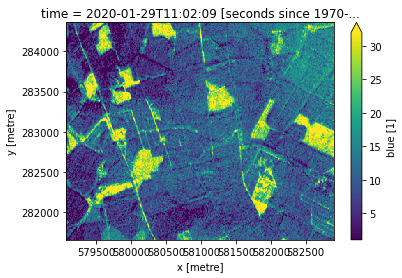

In [6]:
ds.blue.isel(time=5).plot(robust=True)

Throughout these notebooks every attempt has been made to just produce single simple calls to produce effective results. Much of the heavy lifting is done via utility functions that are imported at the top of every notebook. To explore these in detail you will need to find the jncc_utils.py file. Many of the functions in this utils file have been adpated or copied under the terms of the license from other datacube notebooks code. An example of a call is to jncc.rgb which will plot the images in a RGB colour plot. The example code looks like:

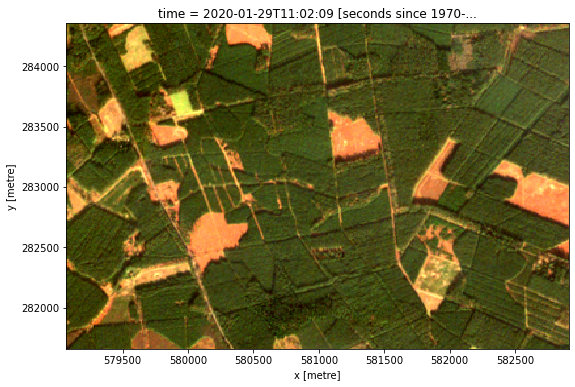

In [7]:
import sys
sys.path.append('./utils')
import jncc_utils # jncc utils file containing helper functions from open data cube resources
jncc_utils.rgb(ds, bands=["red", "green", "blue"], index=5)

The example notebooks are structured in a stepped way. You should be able to parse your own values / files / coordinates where needed. 